<a href="https://colab.research.google.com/github/batmanvane/complex-systems-modeling/blob/main/notebooks/02_the_chaos_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complex Systems Modeling - Session 2

# Apply Python to Explore Simple Pattern Generation

Welcome again computational modeling! Today we'll learn to use Google Colab as our "calculator" for understanding complex systems. Just like you use a calculator to solve math problems, we'll use Python to explore how simple rules create complex patterns.

Key Concept: Simple local rules → Complex global behavior

Work through each cell by clicking the play button (▶) or pressing Shift+Enter.

In [1]:
# Import our tools (like getting a calculator ready)
import numpy as np              # For numbers and arrays
import matplotlib.pyplot as plt # For drawing
import random                   # For randomness

print("Tools ready! Let's start modeling.")

Tools ready! Let's start modeling.


## Part 1: Basic Python Concepts

Let's start with the building blocks we need for modeling a complex systems such as the chaos game.

In [2]:
# Variables - storing information
x = 0.5    # A single number (our starting point)
y = 0.3

print(f"Starting position: ({x}, {y})")

# Lists - storing multiple values
x_positions = [0.1, 0.5, 0.9]  # Multiple x coordinates
y_positions = [0.2, 0.8, 0.1]  # Multiple y coordinates

print(f"Multiple positions: {list(zip(x_positions, y_positions))}")

Starting position: (0.5, 0.3)
Multiple positions: [(0.1, 0.2), (0.5, 0.8), (0.9, 0.1)]


In [3]:
# Functions - reusable pieces of code (like mathematical functions)
def midpoint(point1, point2):
    """Find the midpoint between two points - a simple rule!"""
    x1, y1 = point1
    x2, y2 = point2

    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2

    return (mid_x, mid_y)

# Test our function
point_A = (0, 0)
point_B = (1, 1)
middle = midpoint(point_A, point_B)

print(f"Midpoint between {point_A} and {point_B} is {middle}")

# TODO: Try changing point_A and point_B to different values and see what happens

Midpoint between (0, 0) and (1, 1) is (0.5, 0.5)


## Part 2: Making Our First Plot

Visualization is crucial for understanding complex systems!

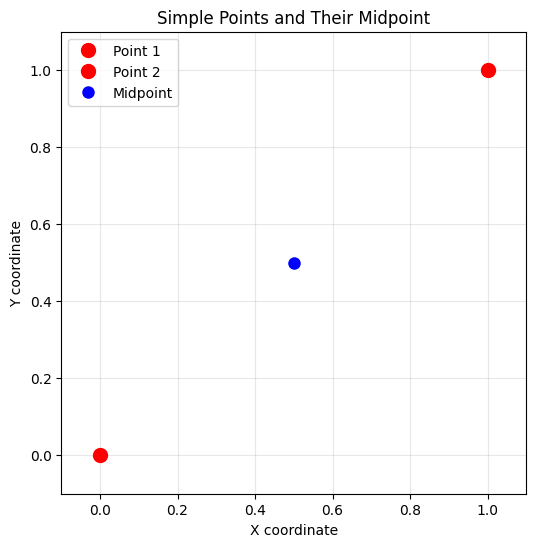

This is how we visualize our system!


In [4]:
# Let's plot some points
fig, ax = plt.subplots(figsize=(6, 6))

# Plot our test points
points = [(0, 0), (1, 1), (0.5, 0.5)]  # Start, end, and midpoint

for i, point in enumerate(points):
    x, y = point
    if i < 2:
        ax.plot(x, y, 'ro', markersize=10, label=f'Point {i+1}')
    else:
        ax.plot(x, y, 'bo', markersize=8, label='Midpoint')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_title('Simple Points and Their Midpoint')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

print("This is how we visualize our system!")

## Part 3: Loops - Repeating Simple Rules

Complex systems emerge (=emergence) when simple rules are repeated many times. Let's learn about loops!

In [5]:
# A simple pattern: repeatedly move toward a target
def generate_converging_points(start, target, steps=10):
    """Simple rule: always move halfway toward the target"""
    points = [start]  # Start with initial position
    current = start

    for i in range(steps):
        # Apply our simple rule: move halfway to target
        next_point = midpoint(current, target)
        points.append(next_point)
        current = next_point

        # Let's see what's happening
        print(f"Step {i+1}: {current}")

    return points

# Apply our simple rule repeatedly
start_point = (0.1, 0.1)
target_point = (0.8, 0.8)

trajectory = generate_converging_points(start_point, target_point, 8)

print(f"\nStarted at {start_point}, moving toward {target_point}")
print(f"Generated {len(trajectory)} points")

Step 1: (0.45, 0.45)
Step 2: (0.625, 0.625)
Step 3: (0.7125, 0.7125)
Step 4: (0.7562500000000001, 0.7562500000000001)
Step 5: (0.7781250000000001, 0.7781250000000001)
Step 6: (0.7890625, 0.7890625)
Step 7: (0.79453125, 0.79453125)
Step 8: (0.7972656250000001, 0.7972656250000001)

Started at (0.1, 0.1), moving toward (0.8, 0.8)
Generated 9 points


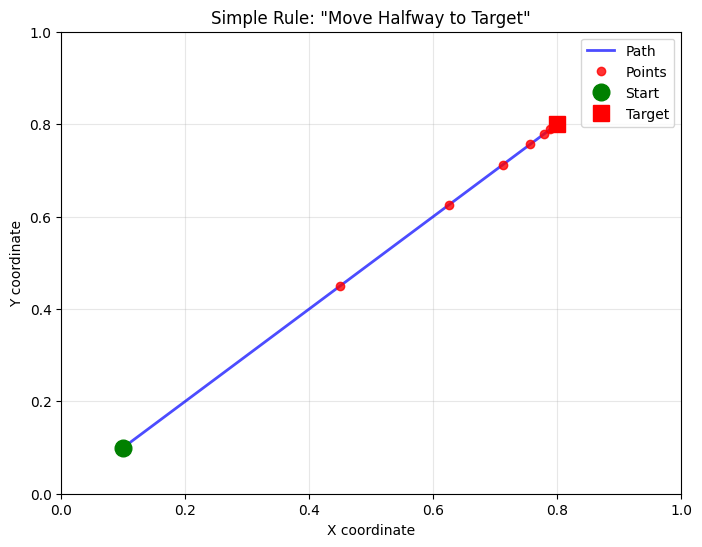

In [6]:
# Visualize the pattern that emerges
fig, ax = plt.subplots(figsize=(8, 6))

# Extract x and y coordinates
x_coords = [point[0] for point in trajectory]
y_coords = [point[1] for point in trajectory]

# Plot the trajectory
ax.plot(x_coords, y_coords, 'b-', alpha=0.7, linewidth=2, label='Path')
ax.plot(x_coords, y_coords, 'ro', markersize=6, alpha=0.8, label='Points')

# Highlight start and target
ax.plot(start_point[0], start_point[1], 'go', markersize=12, label='Start')
ax.plot(target_point[0], target_point[1], 'rs', markersize=12, label='Target')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_title('Simple Rule: "Move Halfway to Target"')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

# TODO: Try changing the start_point or target_point and see what happens!
# TODO: What happens if you increase the number of steps?

## Part 4: Adding Randomness - The Seeds of Complexity

Many complex systems include randomness. But it is not essential for emergence to happen. Here we use it as a driver to implement the rule "randomly choose a point". Let's introduce random choice!

In [7]:
# Multiple targets - randomly choose which one to move toward
def random_walk_with_targets(start, targets, steps=50):
    """Simple rule: randomly pick a target, then move halfway toward it"""
    points = [start]
    current = start

    for i in range(steps):
        # Randomly choose a target
        chosen_target = random.choice(targets)

        # Move halfway toward chosen target
        next_point = midpoint(current, chosen_target)
        points.append(next_point)
        current = next_point

    return points

# Define three corner targets (triangle vertices)
triangle_vertices = [(0, 0), (1, 0), (0.5, 1)]
start_point = (0.5, 0.3)

# Generate random walk
random_trajectory = random_walk_with_targets(start_point, triangle_vertices, 100)

print(f"Generated {len(random_trajectory)} points using random target selection")
print(f"Targets were: {triangle_vertices}")

Generated 101 points using random target selection
Targets were: [(0, 0), (1, 0), (0.5, 1)]


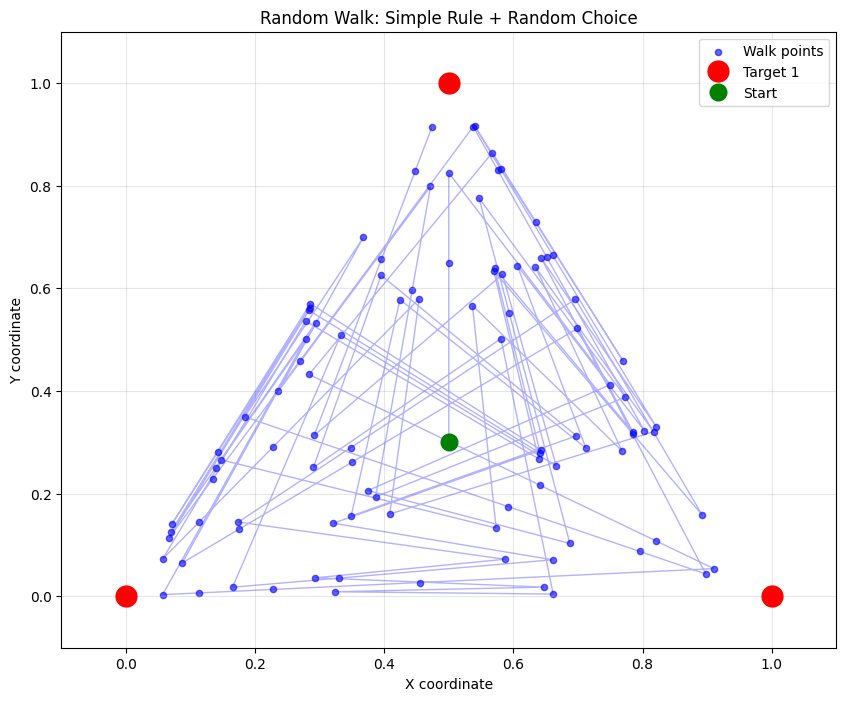

Notice: Simple rule + randomness = complex-looking pattern!


In [8]:
# Visualize the random walk pattern
fig, ax = plt.subplots(figsize=(10, 8))

# Extract coordinates
x_coords = [point[0] for point in random_trajectory]
y_coords = [point[1] for point in random_trajectory]

# Plot the random walk
ax.plot(x_coords, y_coords, 'b-', alpha=0.3, linewidth=1)
ax.scatter(x_coords[1:], y_coords[1:], c='blue', s=20, alpha=0.6, label='Walk points')

# Plot the triangle vertices (targets)
for i, vertex in enumerate(triangle_vertices):
    ax.plot(vertex[0], vertex[1], 'ro', markersize=15, label=f'Target {i+1}' if i == 0 else "")

# Highlight starting point
ax.plot(start_point[0], start_point[1], 'go', markersize=12, label='Start')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_title('Random Walk: Simple Rule + Random Choice')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

print("Notice: Simple rule + randomness = complex-looking pattern!")

# TODO: Run this cell multiple times - does the pattern look the same?
# TODO: What do you think would happen with more steps?

## Part 5: Your First Complex System Exploration

Now let's explore what happens when we apply our simple rule many, many times!

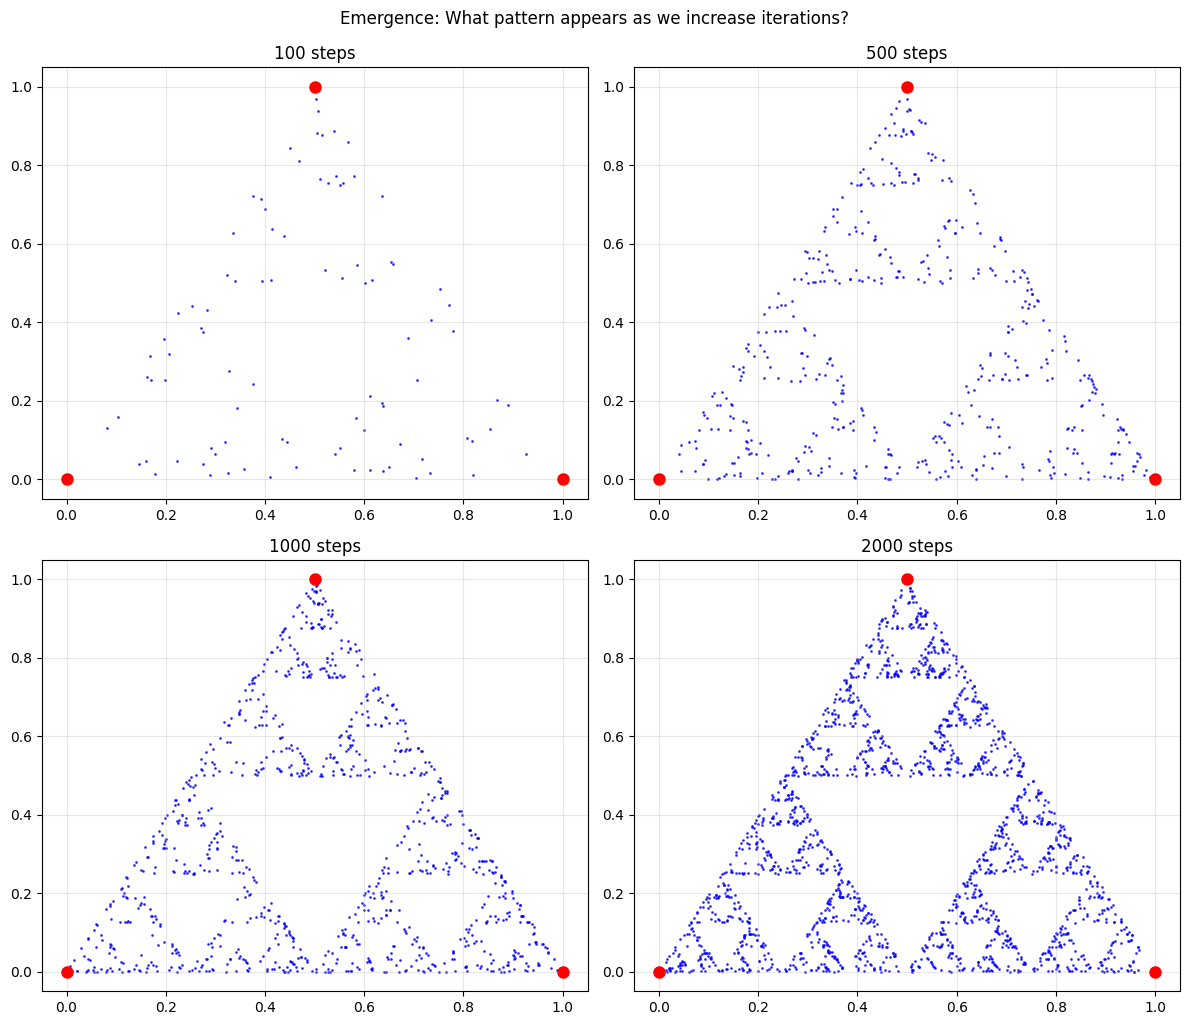

What do you see emerging? Does it remind you of any famous mathematical pattern?


In [9]:
# TODO: Complete this function
def explore_pattern_density(start, targets, steps):
    """Generate many points and see where they cluster"""
    # TODO: Use the random_walk_with_targets function to generate points
    points = random_walk_with_targets(start, targets, steps)

    return points

# Let's generate many points and see what emerges!
triangle_vertices = [(0, 0), (1, 0), (0.5, 1)]
start_point = (0.3, 0.4)

# Try different numbers of steps
step_counts = [100, 500, 1000, 2000]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, steps in enumerate(step_counts):
    points = explore_pattern_density(start_point, triangle_vertices, steps)

    # Extract coordinates
    x_coords = [point[0] for point in points[10:]]  # Skip first few points
    y_coords = [point[1] for point in points[10:]]

    # Plot
    axes[i].scatter(x_coords, y_coords, c='blue', s=1, alpha=0.7)

    # Plot triangle vertices
    for vertex in triangle_vertices:
        axes[i].plot(vertex[0], vertex[1], 'ro', markersize=8)

    axes[i].set_xlim(-0.05, 1.05)
    axes[i].set_ylim(-0.05, 1.05)
    axes[i].set_title(f'{steps} steps')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Emergence: What pattern appears as we increase iterations?', y=1.02)
plt.show()

print("What do you see emerging? Does it remind you of any famous mathematical pattern?")

## Reflection Questions

Think about these questions:

1. **Simple Rule**
   What was our simple rule in the random walk (or in the Sierpiński carpet)?
   How can such a rule describe or *generate* a complex pattern?

2. **Emergence**
   What pattern do you see emerging in the plots above?
   How does this large-scale structure arise from many local or repetitive steps?

3. **Predictability**
   Could you have predicted the global pattern just by looking at the rule?
   What makes emergent behavior surprising even when the rule itself is simple?

4. **Complex Systems**
   How does this relate to the concept *“local simple rules → global complex behavior”*?
   Where else do we see this in nature or technology?

5. **Modeling Abstraction**
   How could such a rule-based pattern serve as a **model** of a real system?
   - For example, the **Sierpiński carpet** can model **porous materials**, where each iteration represents another scale of void formation (like bubbles in foam, pores in rock, or etching in catalysts).
   - Alternatively, it can represent **urban growth** or **land-use patterns**, where repeated subdivision and reserved central spaces mimic city blocks, courtyards, or green zones.
   - In both cases, the *same generative rule* captures how **simple processes or decisions** at small scales lead to **complex, self-similar structures** at large scales.

6. **From Observation to Rule**
   If you were a scientist or engineer observing such systems, how might you **derive** these rules from real data?
   What empirical features (e.g., repeating patterns, self-similarity, central voids, hierarchical organization) would guide your choice of rule?
   How does this process illustrate that **models are abstractions of reality** — simplified, idealized, but capturing the essential logic of the system?


> **Takeaway:**
> The Sierpiński carpet is not meant to look like a real material or city — it *encodes the logic* of how complexity arises.
> Modeling means turning repeated empirical observations into simple generative rules that can explain or predict patterns in the world.


## Programming Concepts You've Learned

 Variables and lists  
 Functions (reusable code)  
 Loops (repetition)  
 Random choice  
 Plotting and visualization  
 The concept of emergence  

> **Homework**: Try changing the triangle vertices to different positions. What happens to the emerging pattern?


In [10]:
# TODO: Experiment zone - try your own modifications!
# 1. Change the triangle vertices to make a different shape
# 2. Try 4 targets instead of 3 (square instead of triangle)
# 3. What happens with just 2 targets?

# Your experiments here:
experimental_targets = [(0, 0), (1, 0), (0, 1), (1, 1)]  # Try a square!

# TODO: Generate and plot the pattern with these new targets
